In [31]:
import INS_Analysis as insd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
trials = '../../Simulations/varied_detector_positions/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,name,distance_from_shielding,distance_from_ground,filename,ptrac_filename
index,,,,,
0,detector_dfs_10_dfg_10,10.0,10.0,output/mctal/detector_dfs_10_dfg_10.mctal,output/ptrac/detector_dfs_10_dfg_10.ptrac
1,detector_dfs_10_dfg_15,10.0,15.0,output/mctal/detector_dfs_10_dfg_15.mctal,output/ptrac/detector_dfs_10_dfg_15.ptrac
2,detector_dfs_10_dfg_20,10.0,20.0,output/mctal/detector_dfs_10_dfg_20.mctal,output/ptrac/detector_dfs_10_dfg_20.ptrac
3,detector_dfs_10_dfg_25,10.0,25.0,output/mctal/detector_dfs_10_dfg_25.mctal,output/ptrac/detector_dfs_10_dfg_25.ptrac
4,detector_dfs_15_dfg_10,15.0,10.0,output/mctal/detector_dfs_15_dfg_10.mctal,output/ptrac/detector_dfs_15_dfg_10.ptrac
5,detector_dfs_15_dfg_15,15.0,15.0,output/mctal/detector_dfs_15_dfg_15.mctal,output/ptrac/detector_dfs_15_dfg_15.ptrac
6,detector_dfs_15_dfg_20,15.0,20.0,output/mctal/detector_dfs_15_dfg_20.mctal,output/ptrac/detector_dfs_15_dfg_20.ptrac
7,detector_dfs_15_dfg_25,15.0,25.0,output/mctal/detector_dfs_15_dfg_25.mctal,output/ptrac/detector_dfs_15_dfg_25.ptrac
8,detector_dfs_15_dfg_35,15.0,35.0,output/mctal/detector_dfs_15_dfg_35.mctal,output/ptrac/detector_dfs_15_dfg_35.ptrac


In [33]:
spectrograms = '../../Simulations/varied_detector_positions/spectrograms.npz'
spectrograms = np.load(spectrograms)
bins = spectrograms['x']
spectrograms = spectrograms['y']

spectrums = '../../Simulations/varied_detector_positions/spectrums.npz'
spectrums = np.load(spectrums)
spectrums = spectrums['y']

gebless_spectrums = '../../Simulations/varied_detector_positions/gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

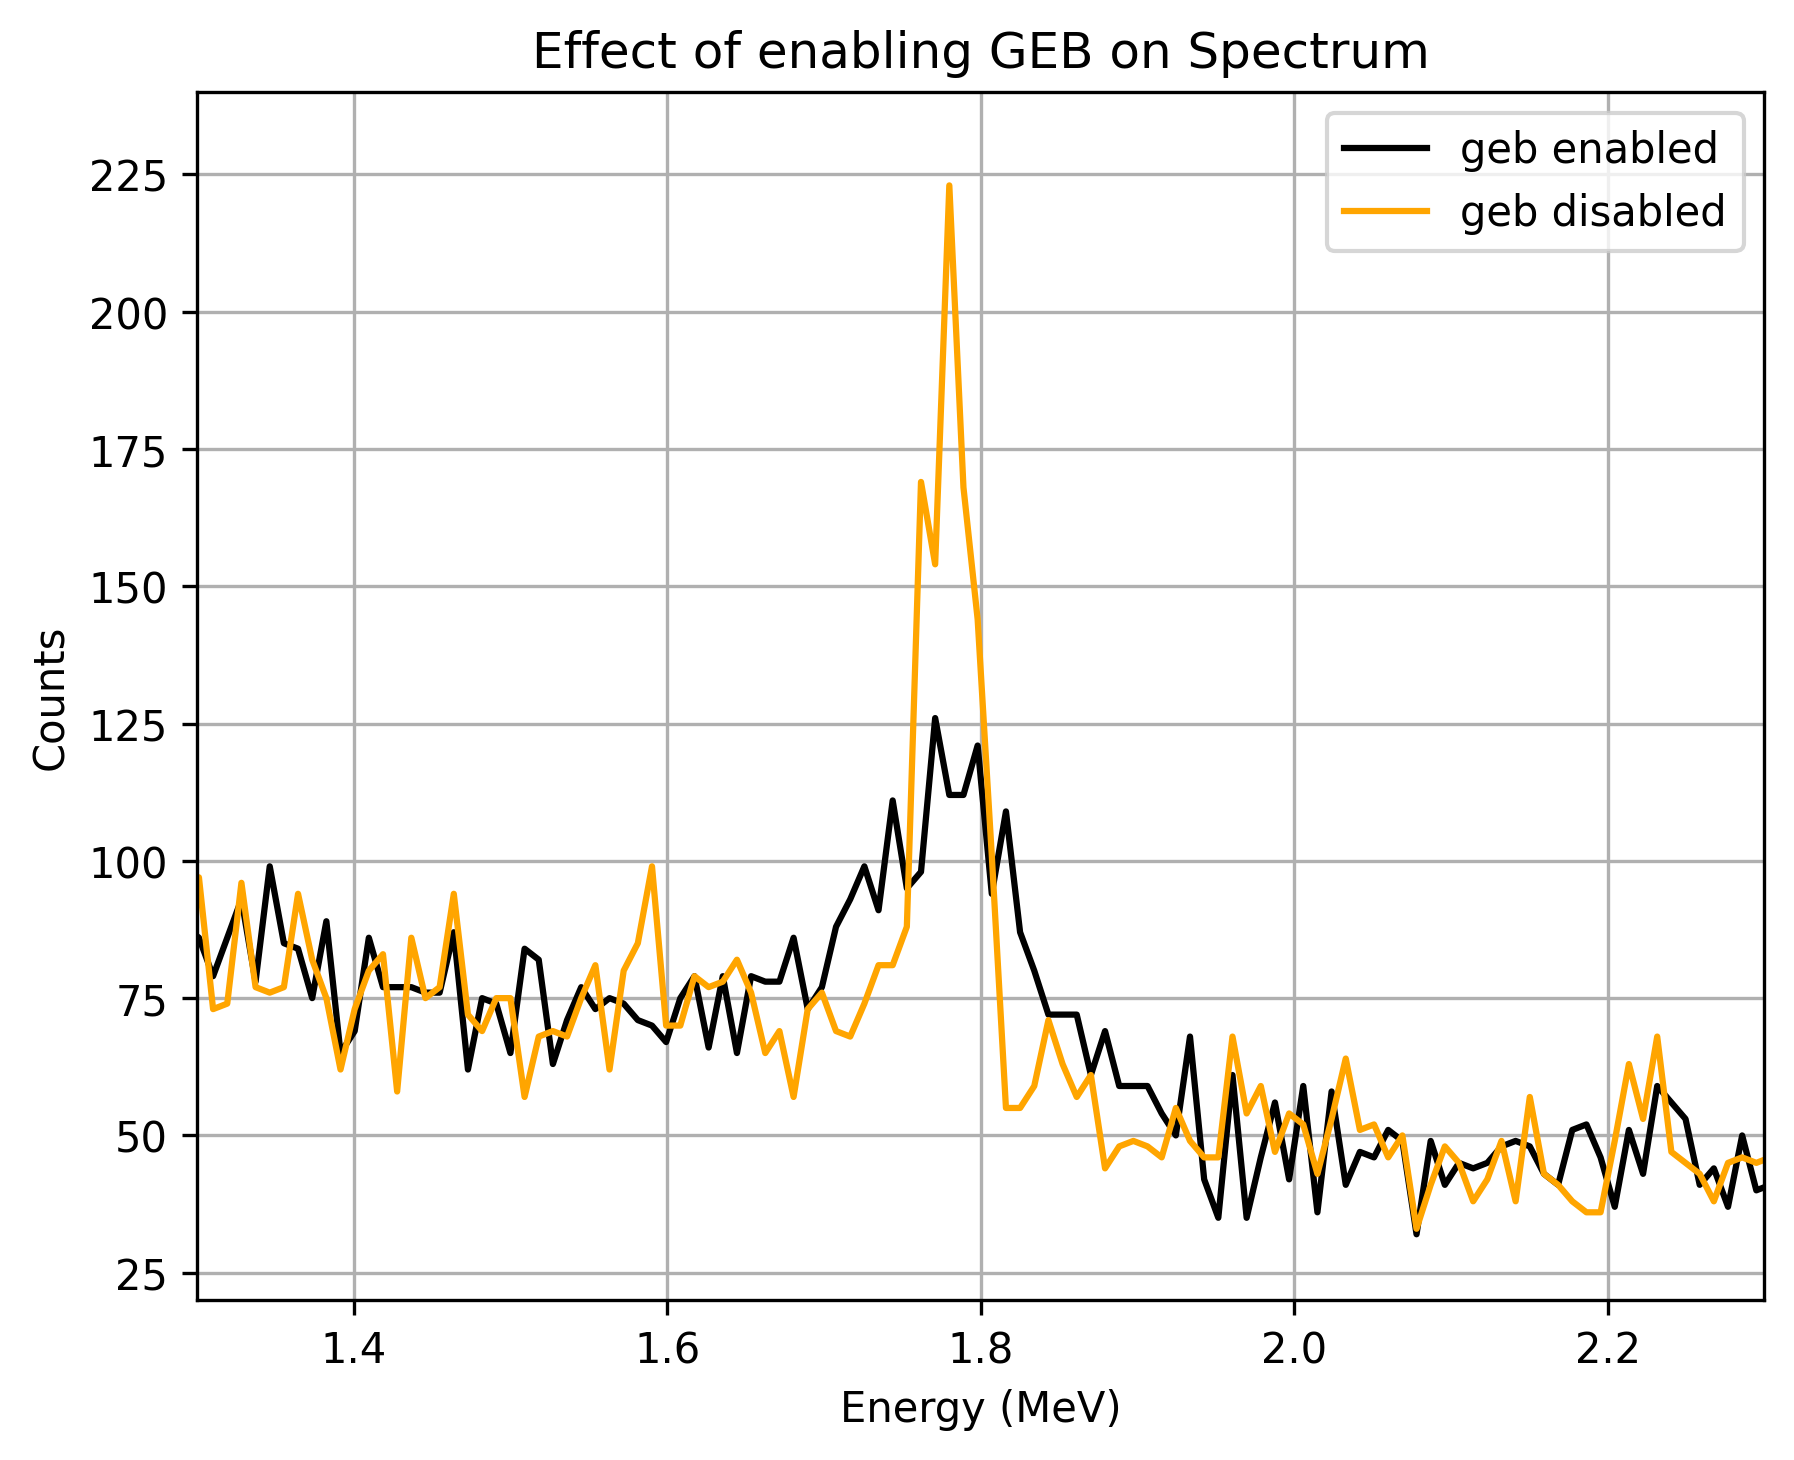

In [47]:
plt.figure(figsize=(6.74, 5.23), dpi=300)
plt.plot(bins, spectrums[14][0][:], label='geb enabled', color='black')
plt.plot(bins, gebless_spectrums[14][0][:], label='geb disabled', color='orange')
plt.xlim(1.3, 2.3)
plt.ylim(20, 240)
plt.legend()
plt.title('Effect of enabling GEB on Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
# add a grid
plt.grid()
plt.show()

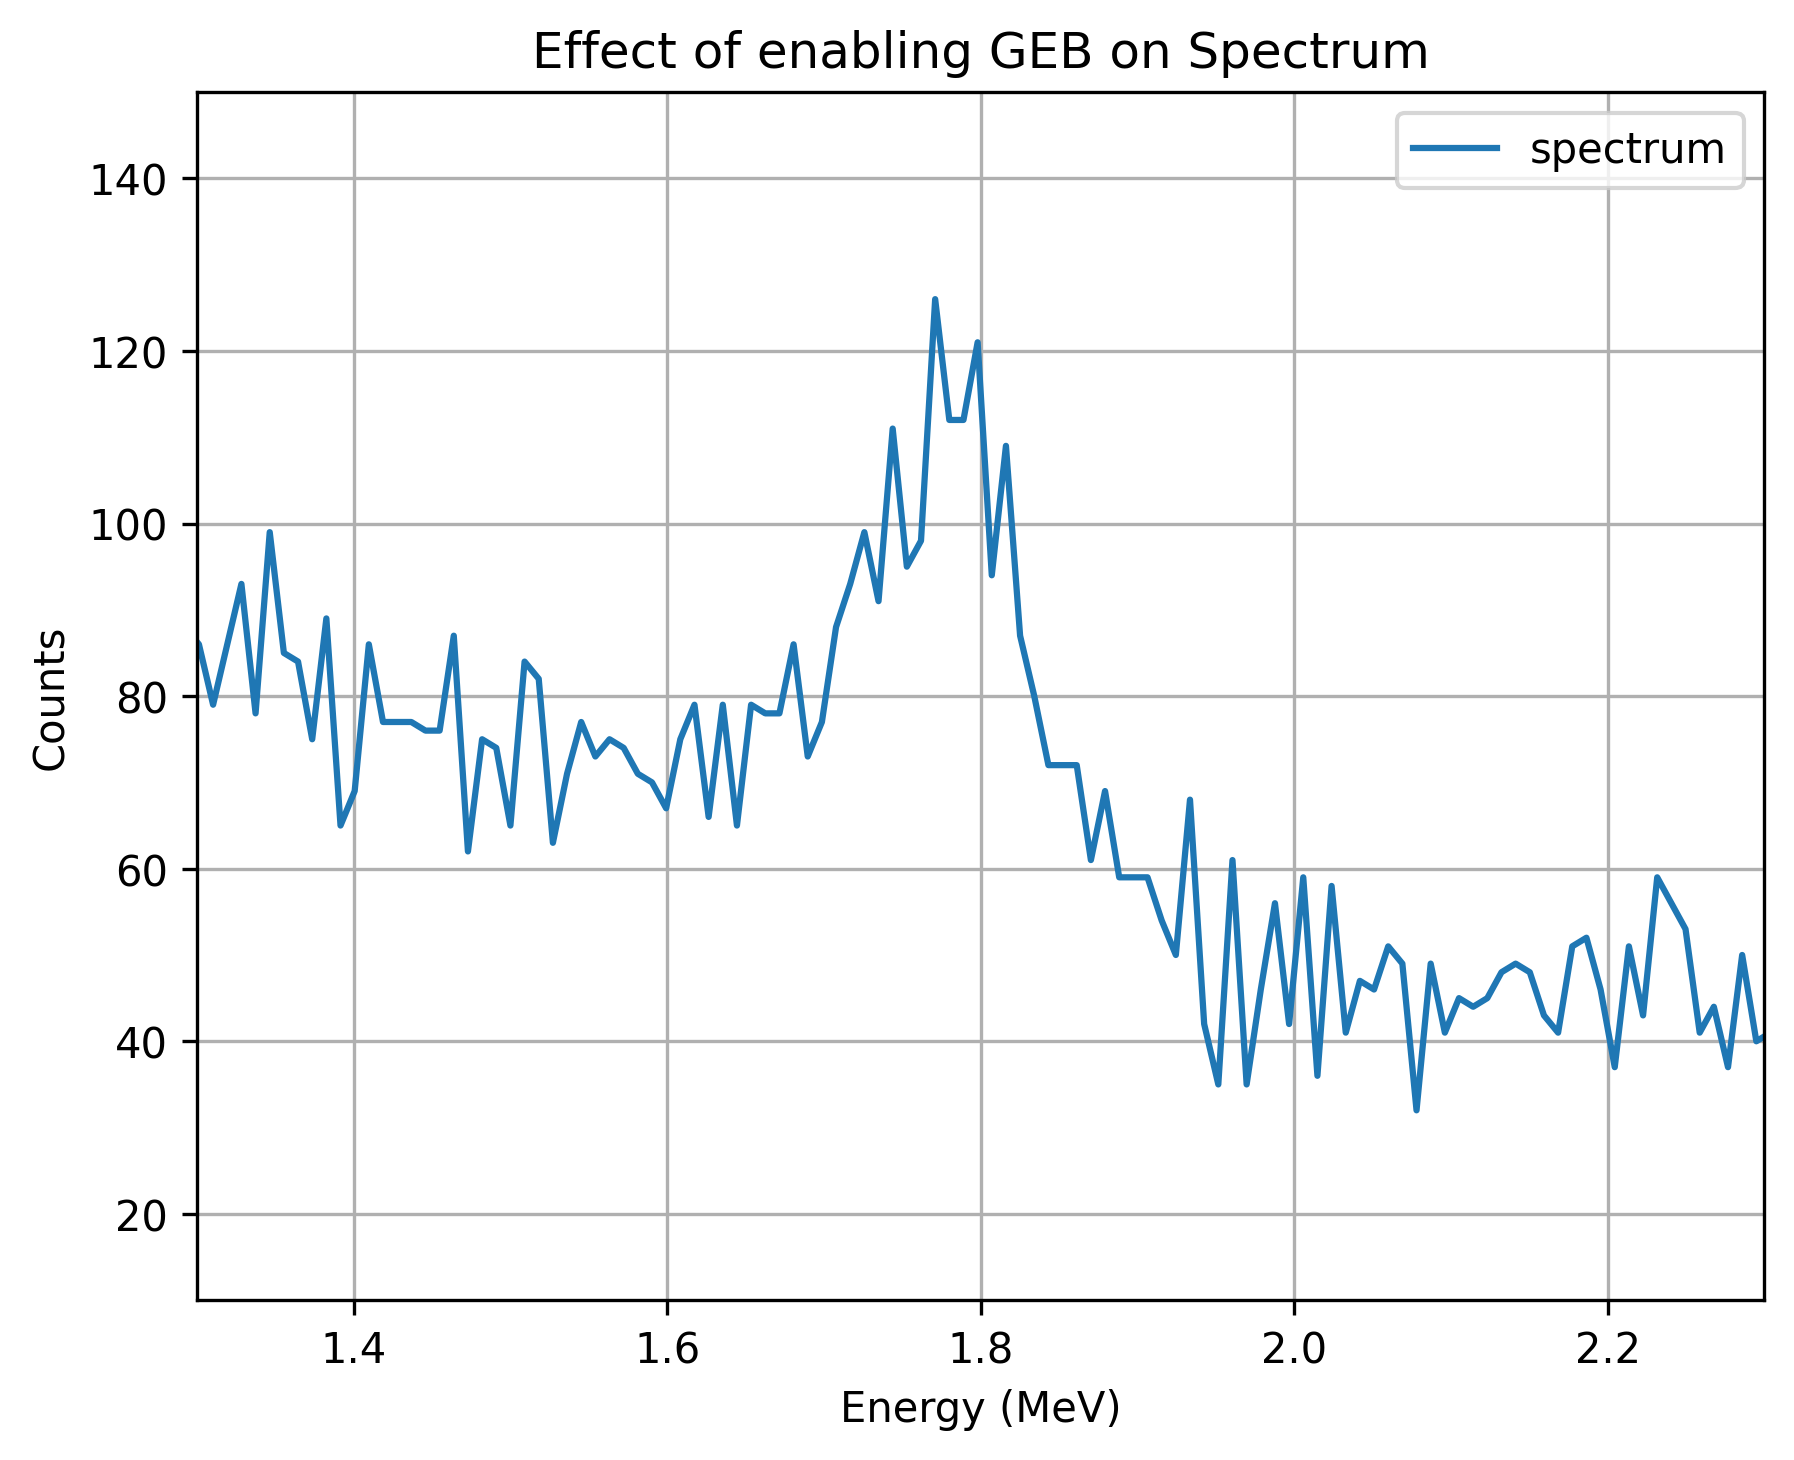

In [35]:
plt.figure(figsize=(6.74, 5.23), dpi=300)
plt.plot(bins, spectrums[14][0][:], label='spectrum')
# plt.plot(bins, gebless_spectrums[14][0][:], label='geb disabled')
plt.xlim(1.3, 2.3)
plt.ylim(10, 150)
plt.legend()
plt.title('Effect of enabling GEB on Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [36]:
areas, fits = insd.calcPeakAreas(
    bins, 
    spectrums[14][0][:], 
    returnFits=True,
    peakWindows={
                'Si1': [1.5, 2.0],
                'Si2C1': [4.2, 4.8],
            },
    )

In [37]:
fits['Si1']['bins']

array([1.50883, 1.51786, 1.5269 , 1.53593, 1.54496, 1.554  , 1.56303,
       1.57207, 1.5811 , 1.59014, 1.59917, 1.60821, 1.61724, 1.62628,
       1.63531, 1.64435, 1.65338, 1.66242, 1.67145, 1.68049, 1.68952,
       1.69856, 1.70759, 1.71663, 1.72566, 1.7347 , 1.74373, 1.75277,
       1.7618 , 1.77084, 1.77987, 1.7889 , 1.79794, 1.80697, 1.81601,
       1.82504, 1.83408, 1.84311, 1.85215, 1.86118, 1.87022, 1.87925,
       1.88829, 1.89732, 1.90636, 1.91539, 1.92443, 1.93346, 1.9425 ,
       1.95153, 1.96057, 1.9696 , 1.97864, 1.98767, 1.99671])

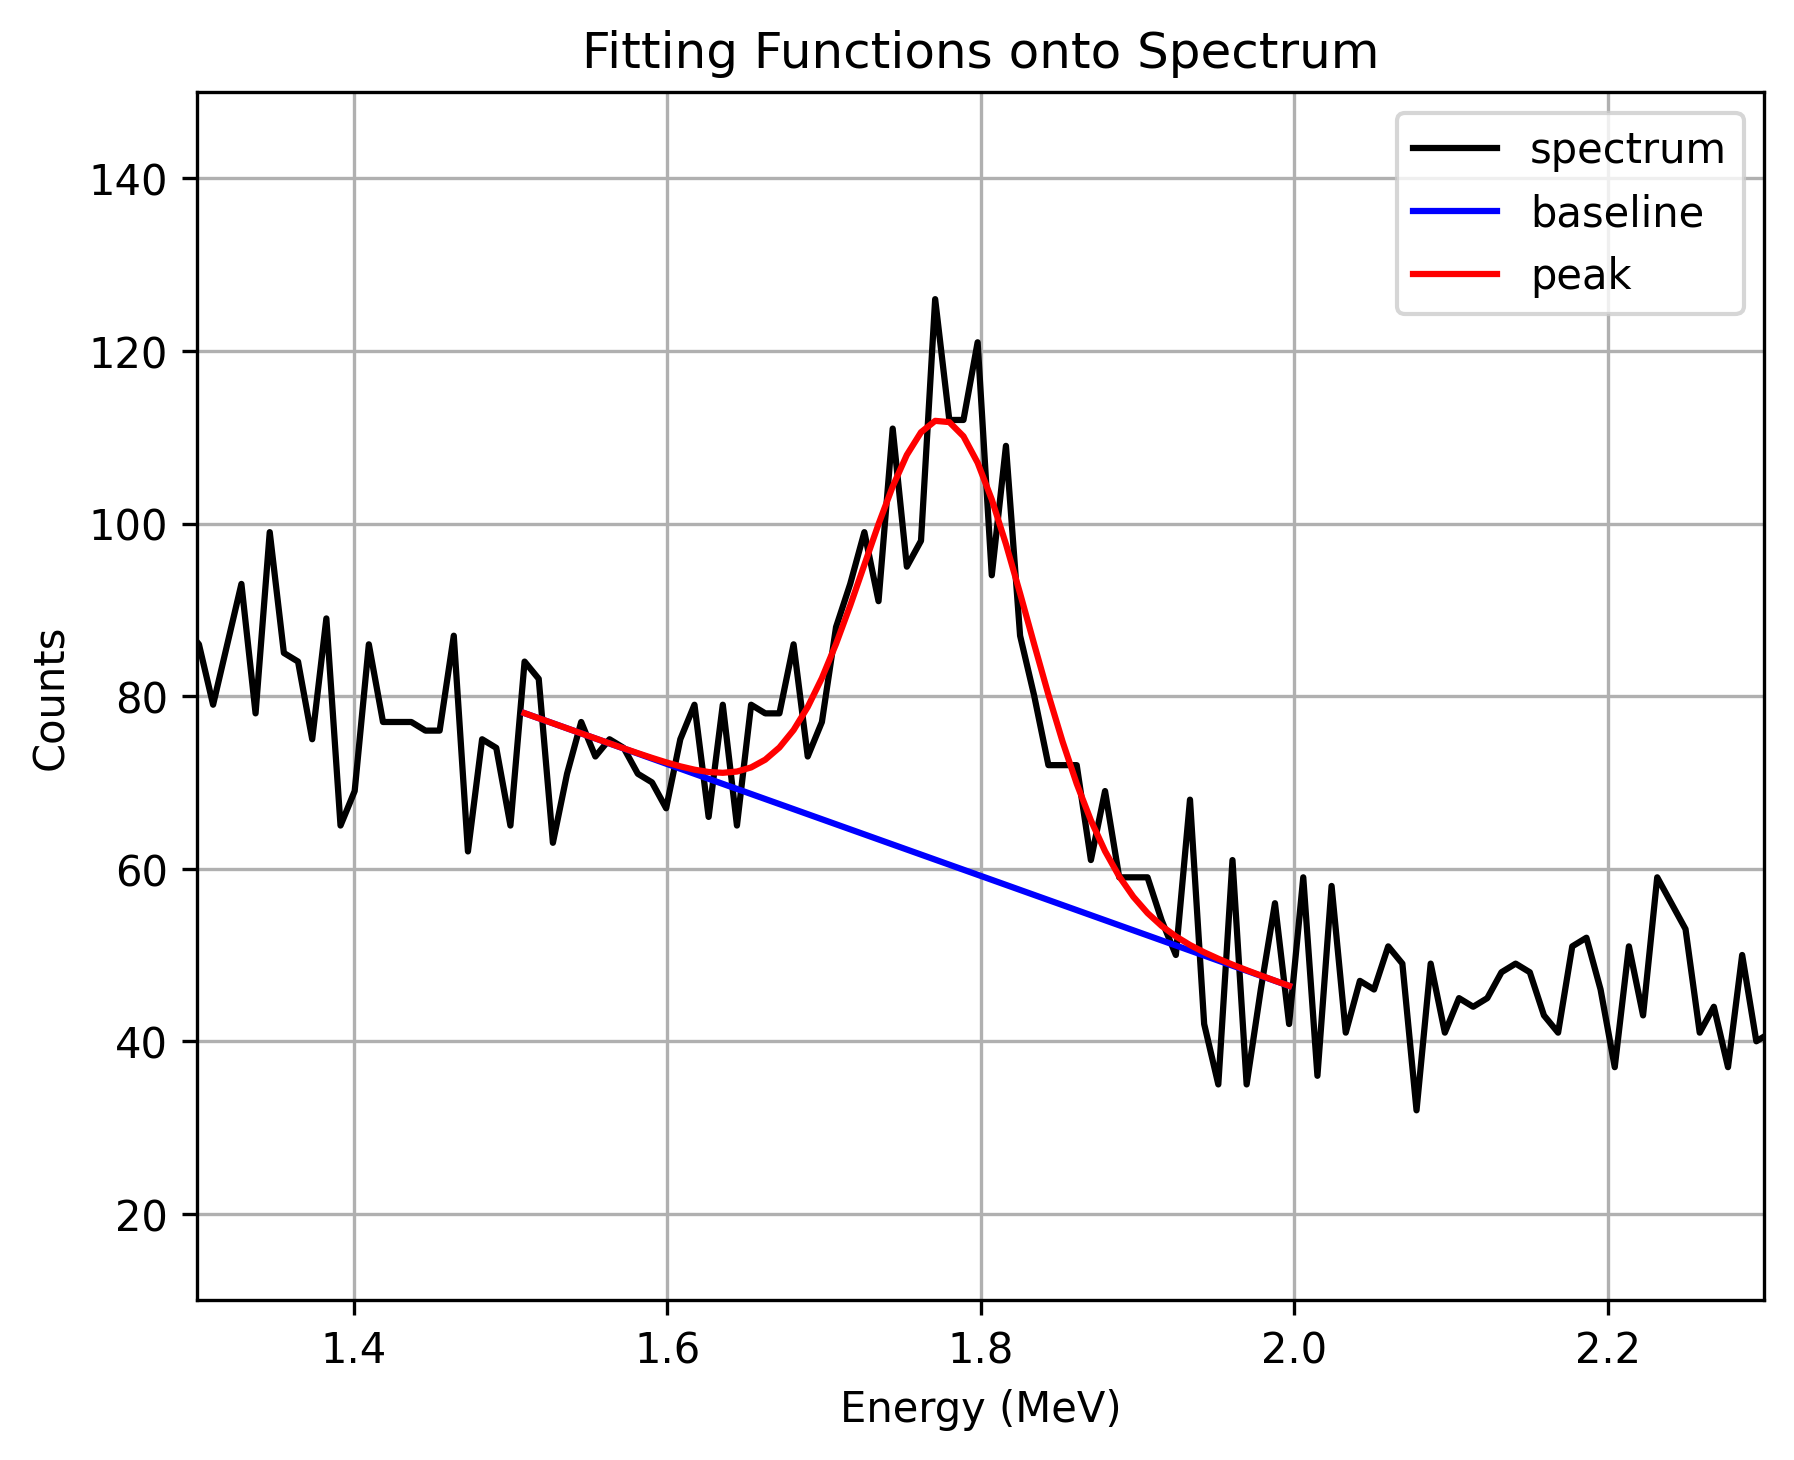

In [38]:
plt.figure(figsize=(6.74, 5.23), dpi=300)
plt.plot(bins, spectrums[14][0][:], label='spectrum', color='black')
plt.plot(fits['Si1']['bins'], fits['Si1']['baseline'], label='baseline', color='blue')
plt.plot(fits['Si1']['bins'], fits['Si1']['peak'], label='peak', color='red')
plt.xlim(1.3, 2.3)
plt.ylim(10, 150)
plt.legend()
plt.title('Fitting Functions onto Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.grid()
plt.show()

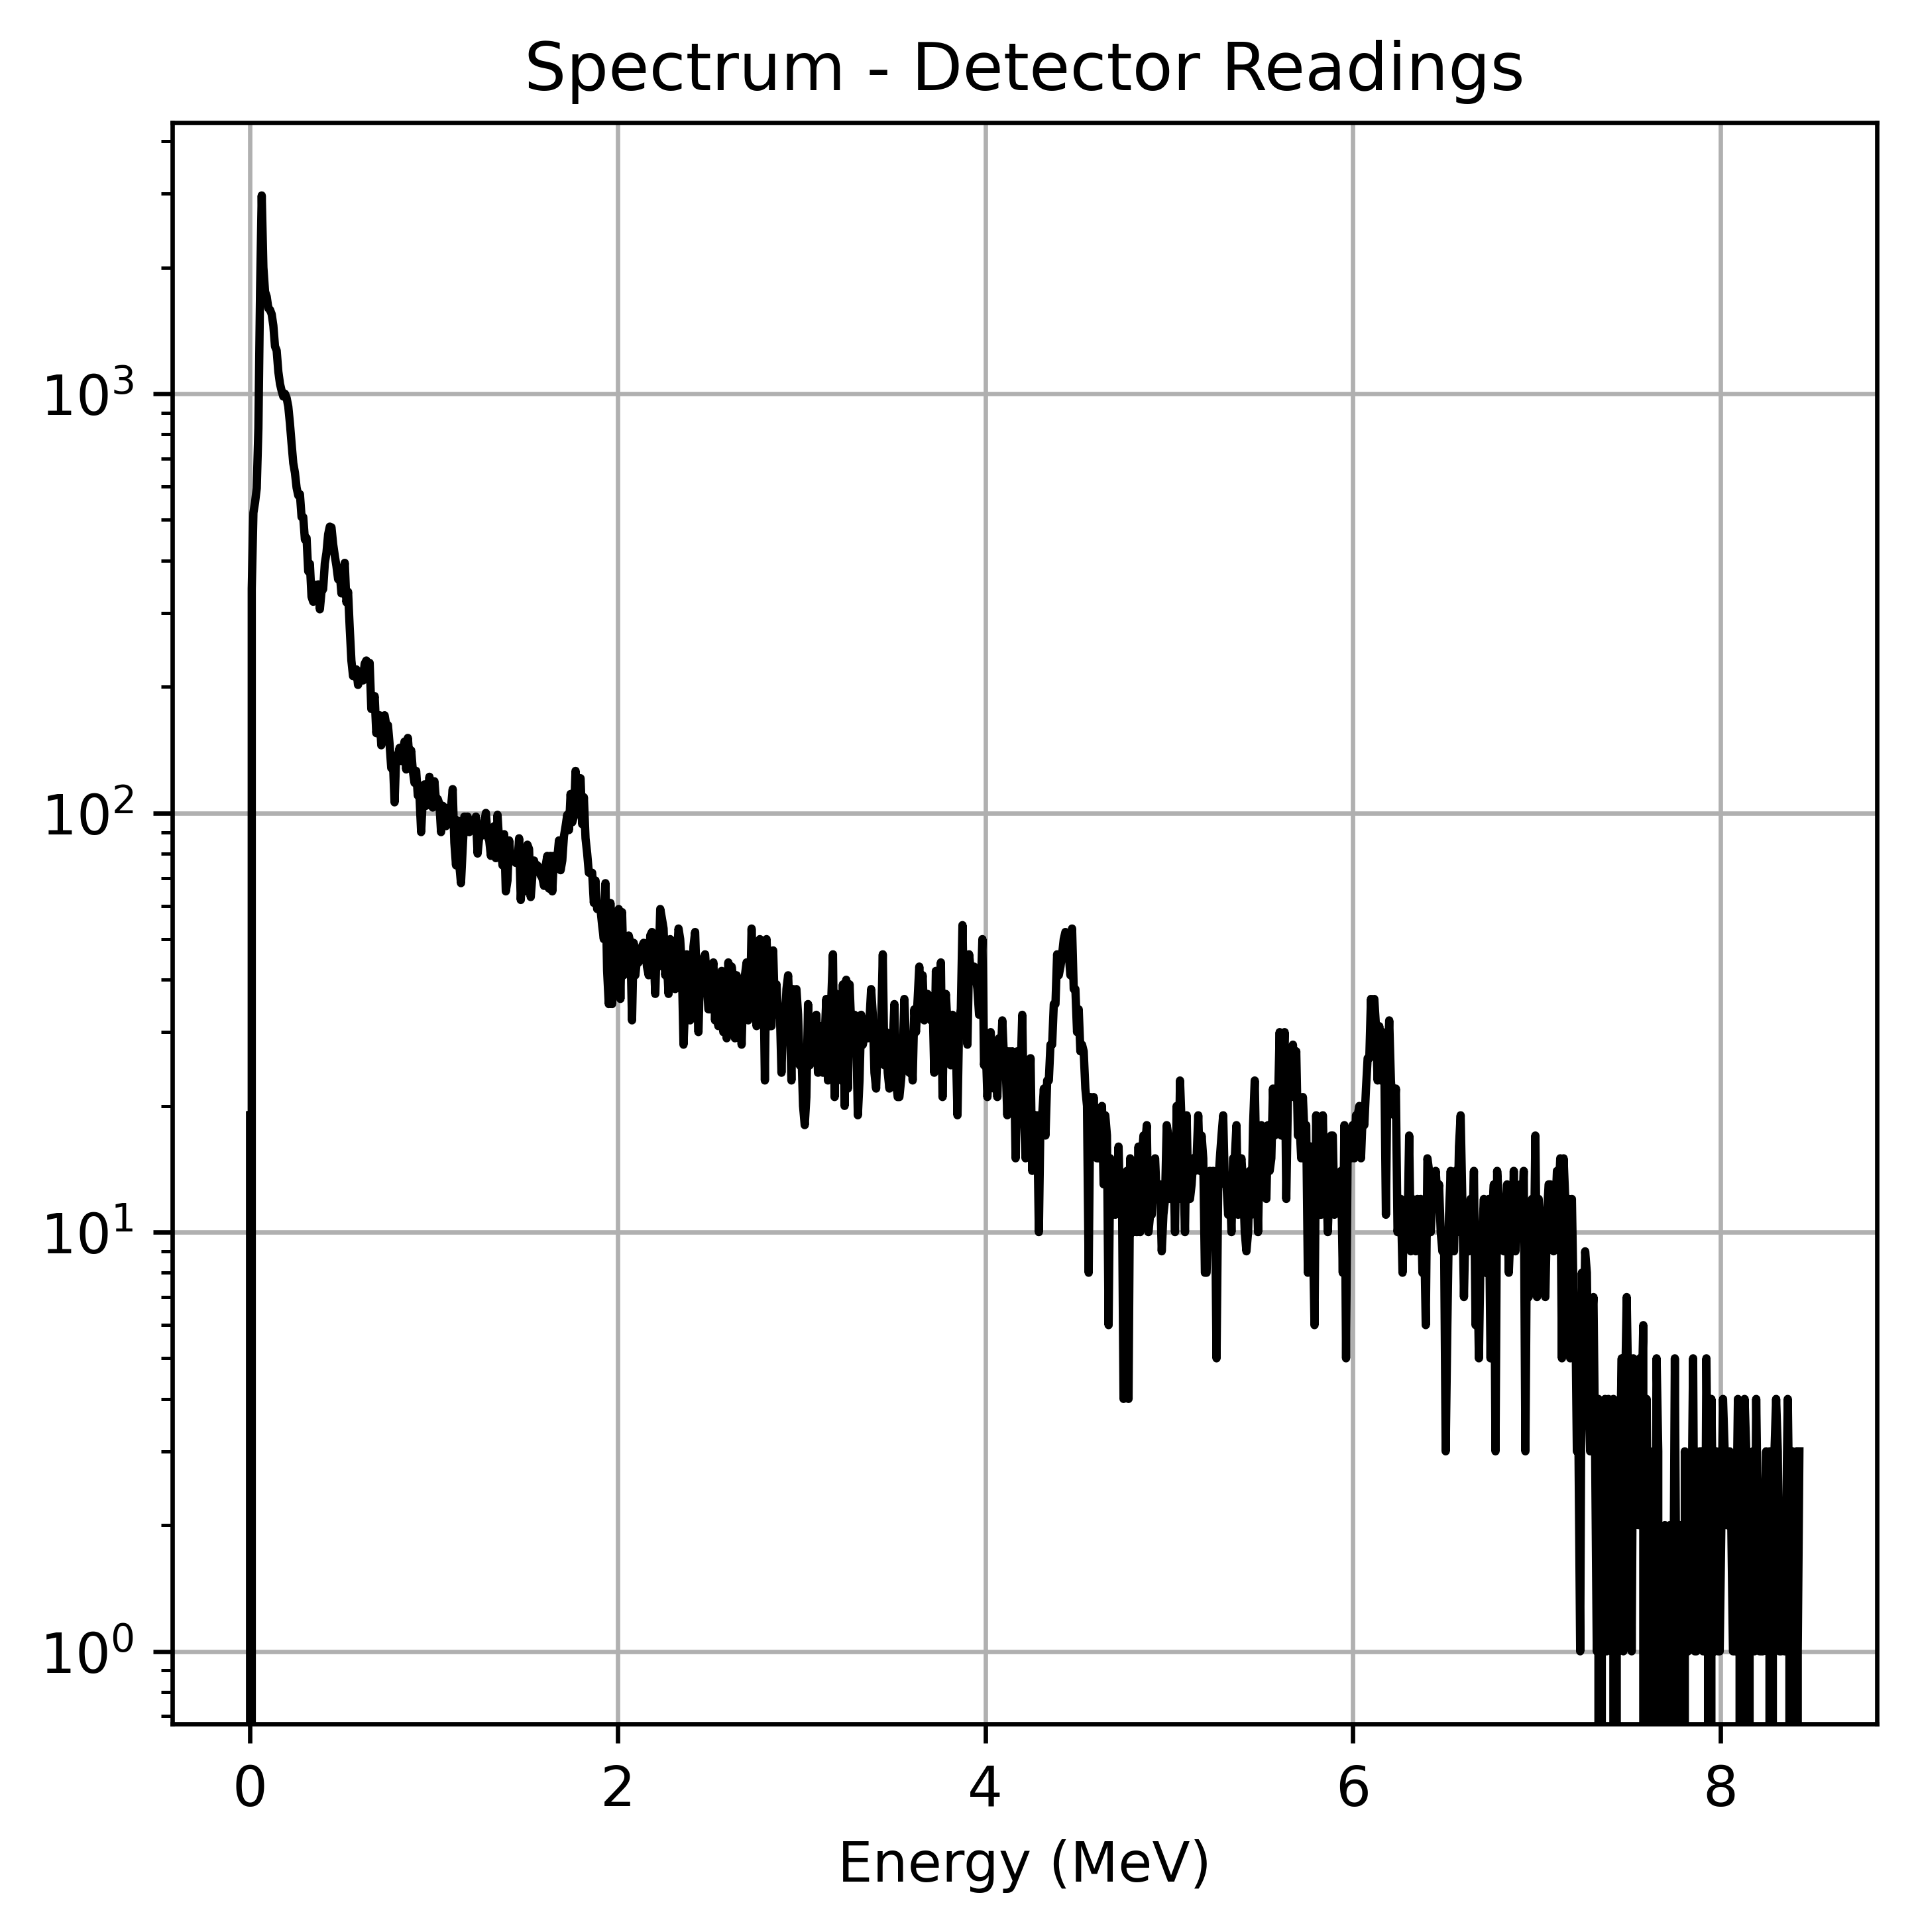

In [69]:
plt.figure(figsize=(5.53, 5.23), dpi=600)
plt.plot(bins, spectrums[14][0][:], label='spectrum', color='black')
# plt.plot(fits['Si1']['bins'], fits['Si1']['baseline'], label='baseline', color='blue')
# plt.plot(fits['Si1']['bins'], fits['Si1']['peak'], label='peak', color='red')
# plt.xlim(1.3, 2.3)
# plt.ylim(10, 150)
# plt.legend()
plt.title('Spectrum - Detector Readings')
plt.xlabel('Energy (MeV)')
# plt.ylabel('Counts')
plt.yscale('log')
plt.grid()
plt.show()

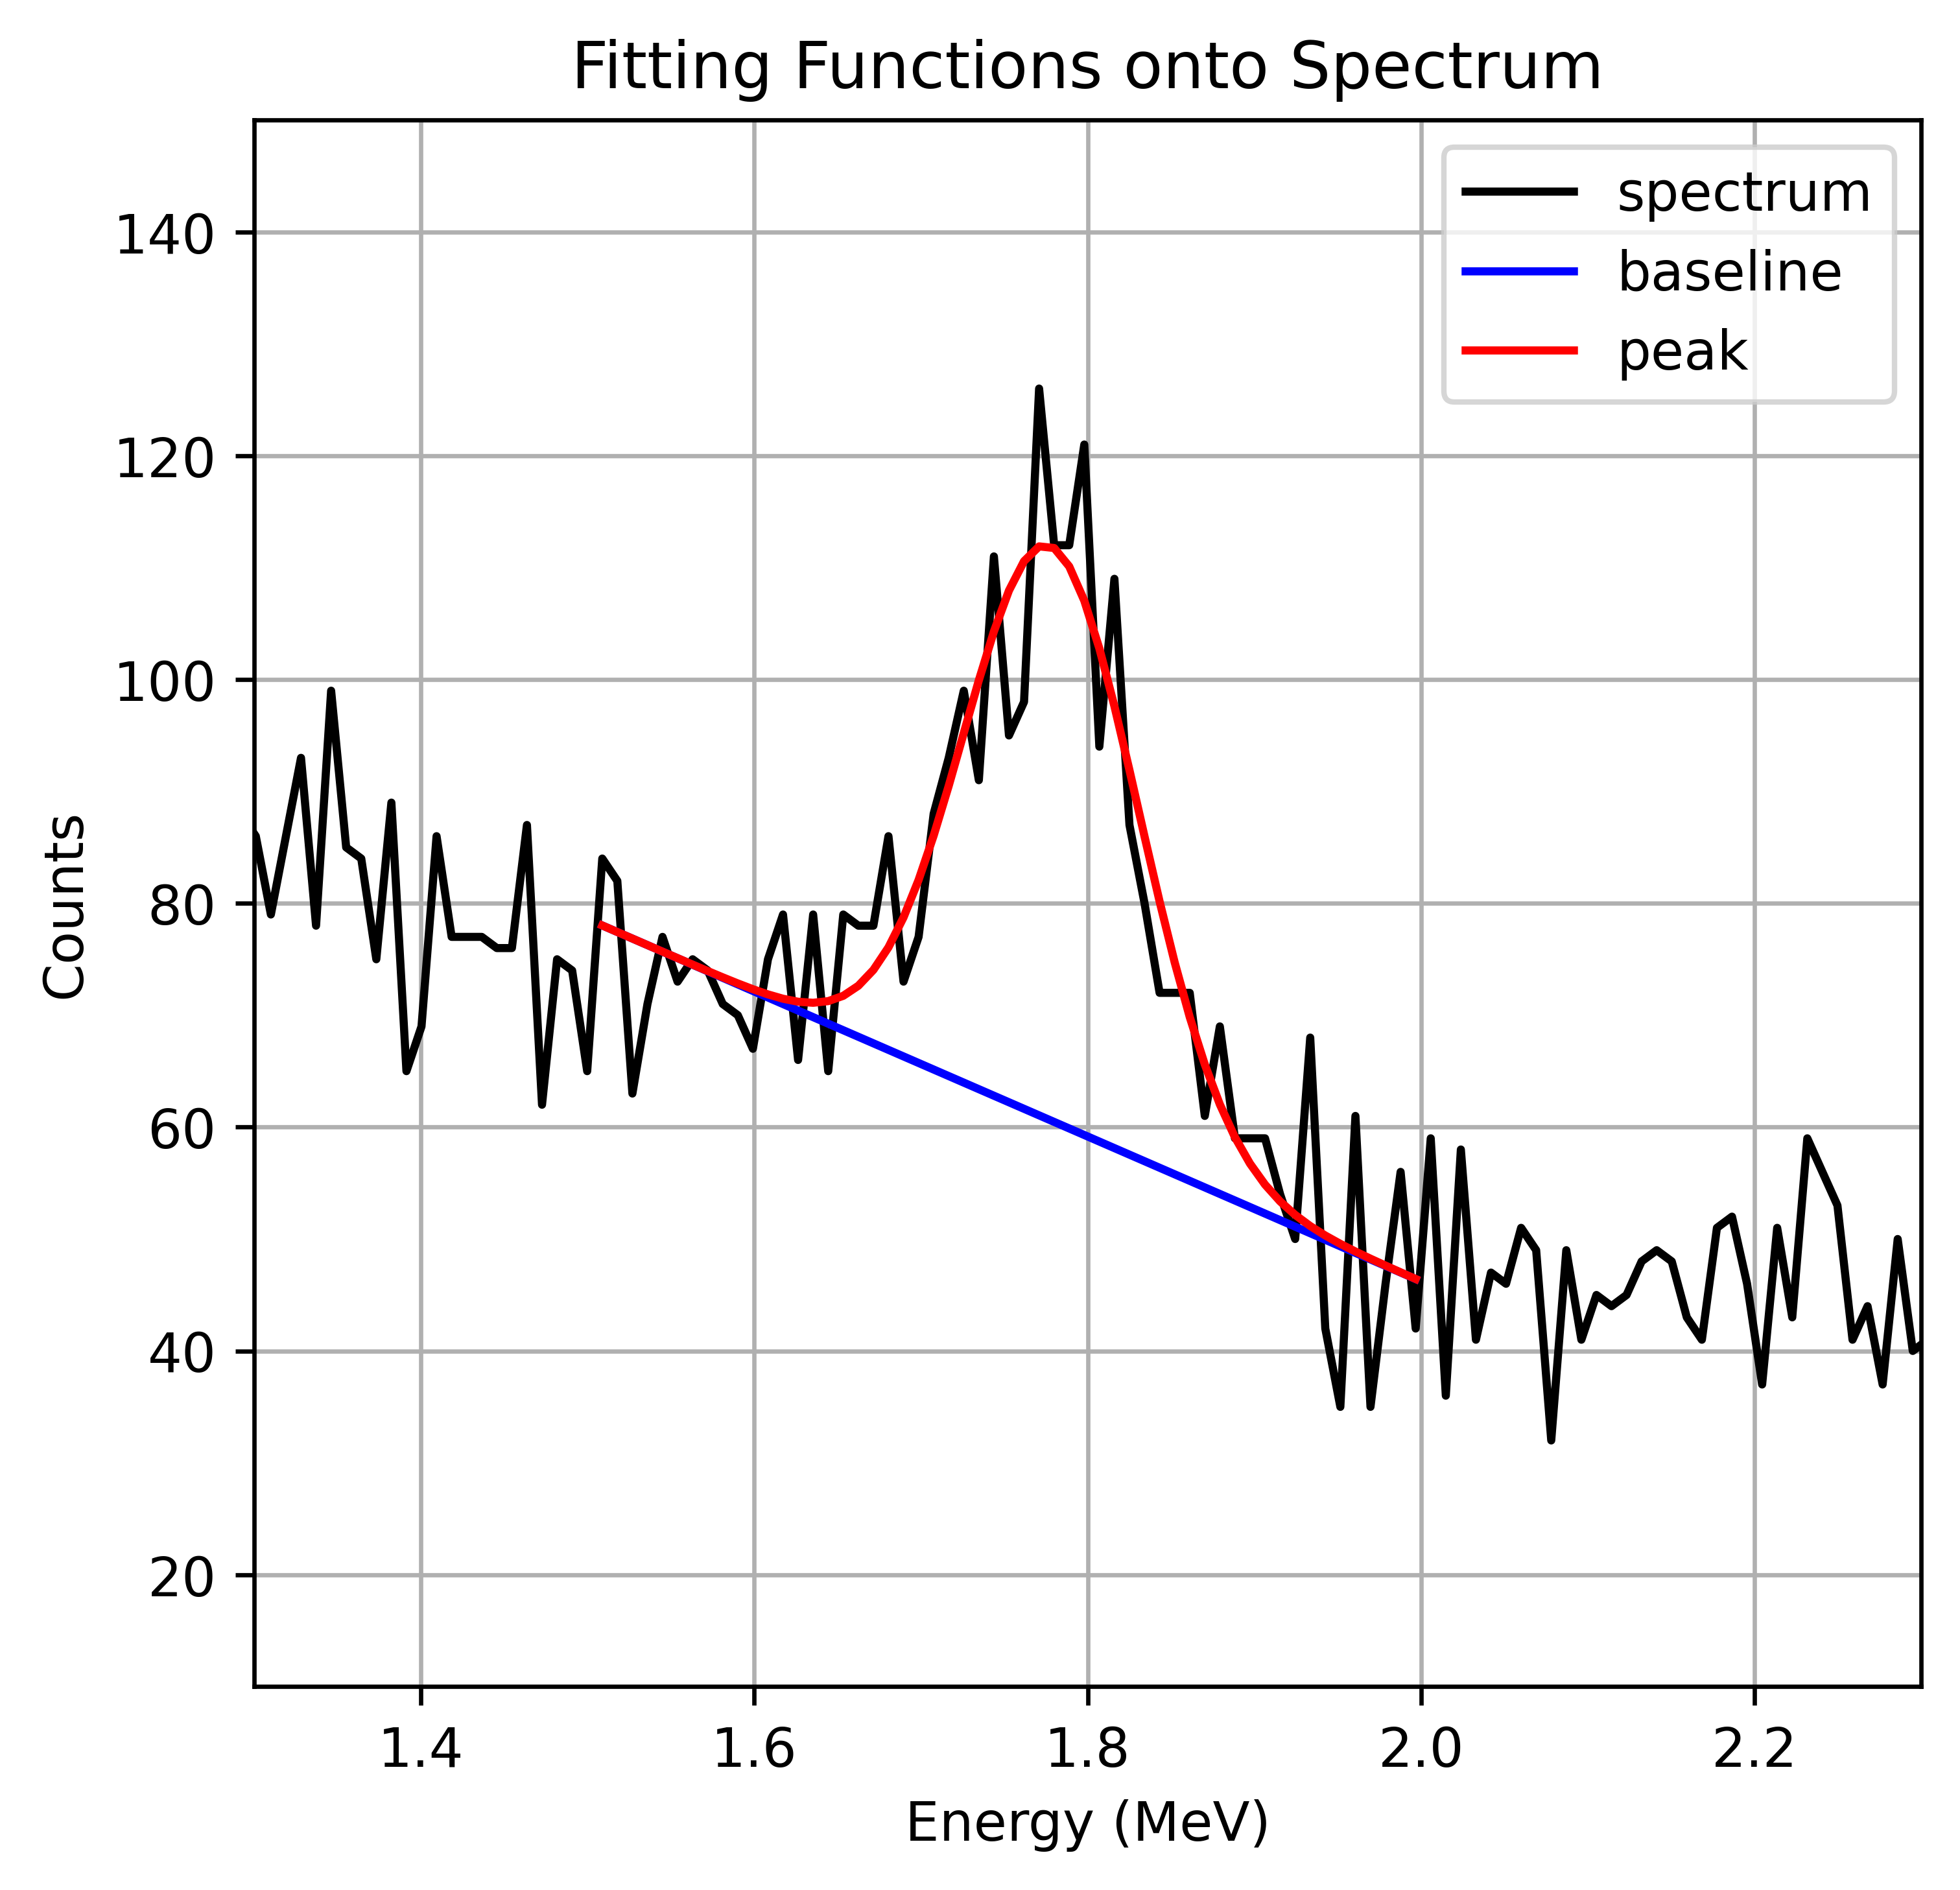

In [70]:
plt.figure(figsize=(5.53, 5.23), dpi=600)
plt.plot(bins, spectrums[14][0][:], label='spectrum', color='black')
plt.plot(fits['Si1']['bins'], fits['Si1']['baseline'], label='baseline', color='blue')
plt.plot(fits['Si1']['bins'], fits['Si1']['peak'], label='peak', color='red')
plt.xlim(1.3, 2.3)
plt.ylim(10, 150)
plt.legend()
plt.title('Fitting Functions onto Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [40]:
areas, point_slope_fits = insd.calcPeakAreas(
    bins, 
    spectrums[14][0][:], 
    returnFits=True,
    peakWindows={
                'Si1': [1.4, 2.2],
                'Si2C1': [4.2, 4.8],
            },
    baselineFunction='point_slope',
    )

areas, exp_falloff_fits = insd.calcPeakAreas(
    bins, 
    spectrums[14][0][:], 
    returnFits=True,
    peakWindows={
                'Si1': [1.4, 2.2],
                'Si2C1': [4.2, 4.8],
            },
    baselineFunction='exp_falloff',
    )

areas, fat_tail_fits = insd.calcPeakAreas(
    bins, 
    spectrums[14][0][:], 
    returnFits=True,
    peakWindows={
                'Si1': [1.4, 2.2],
                'Si2C1': [4.2, 4.8],
            },
    baselineFunction='fat_tail',
    )

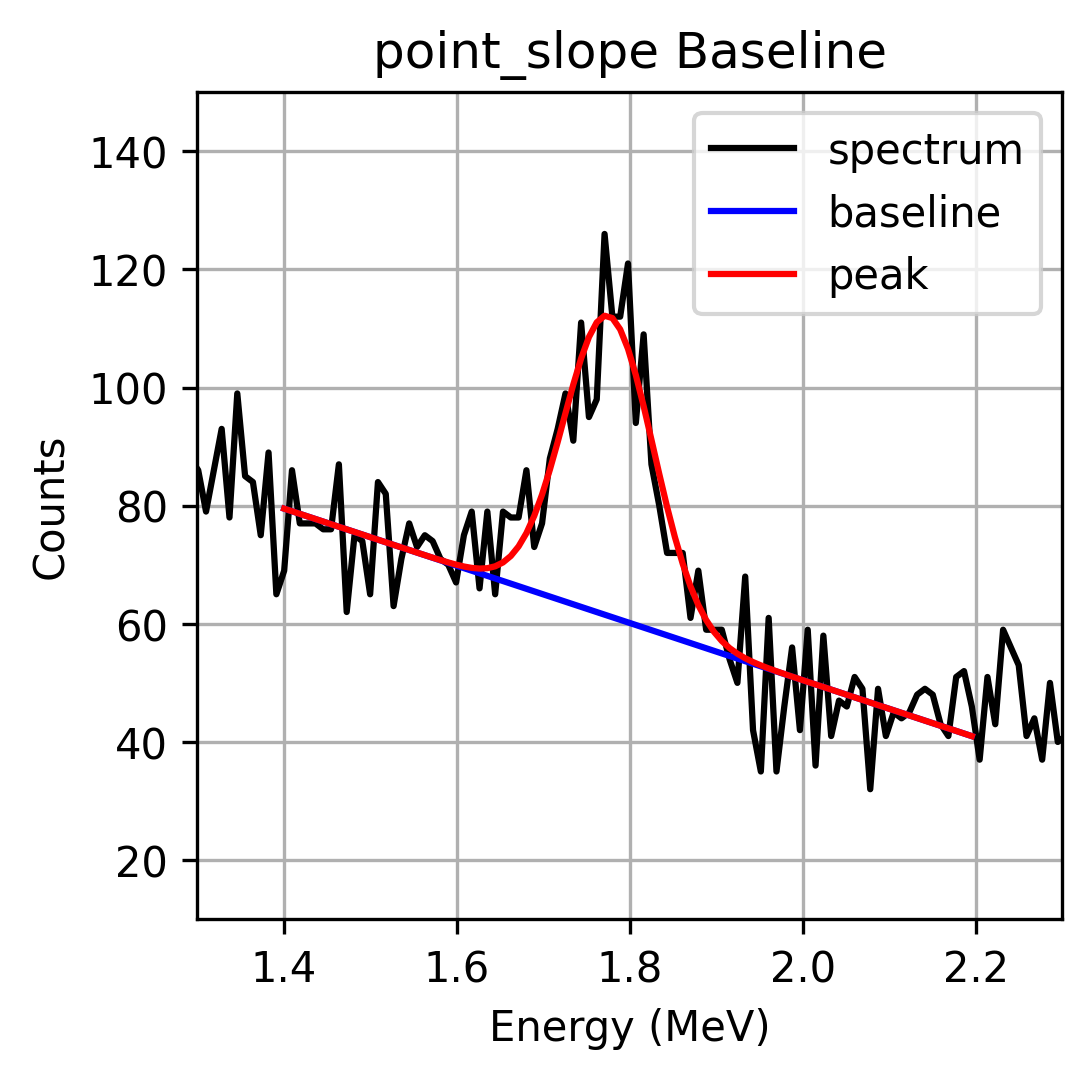

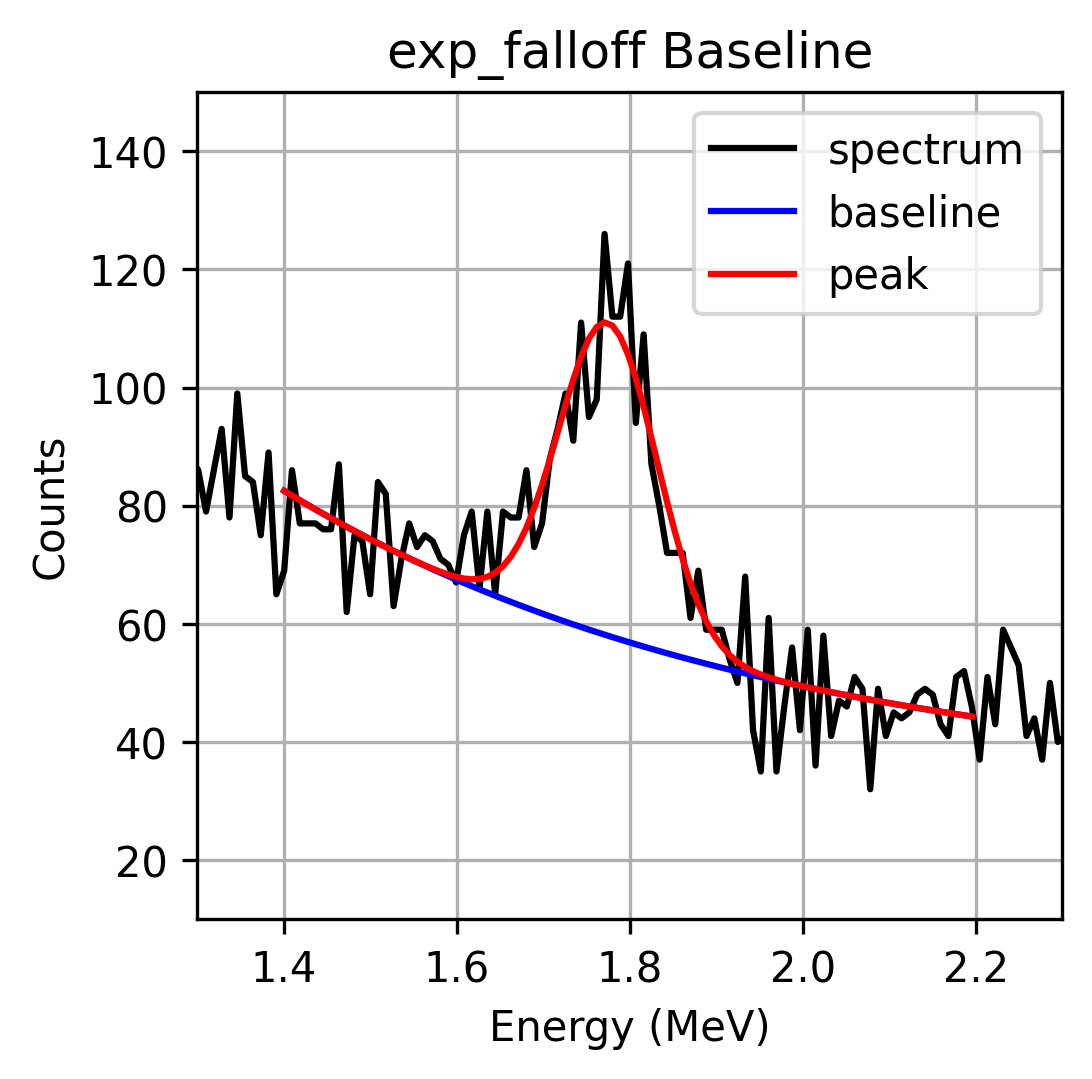

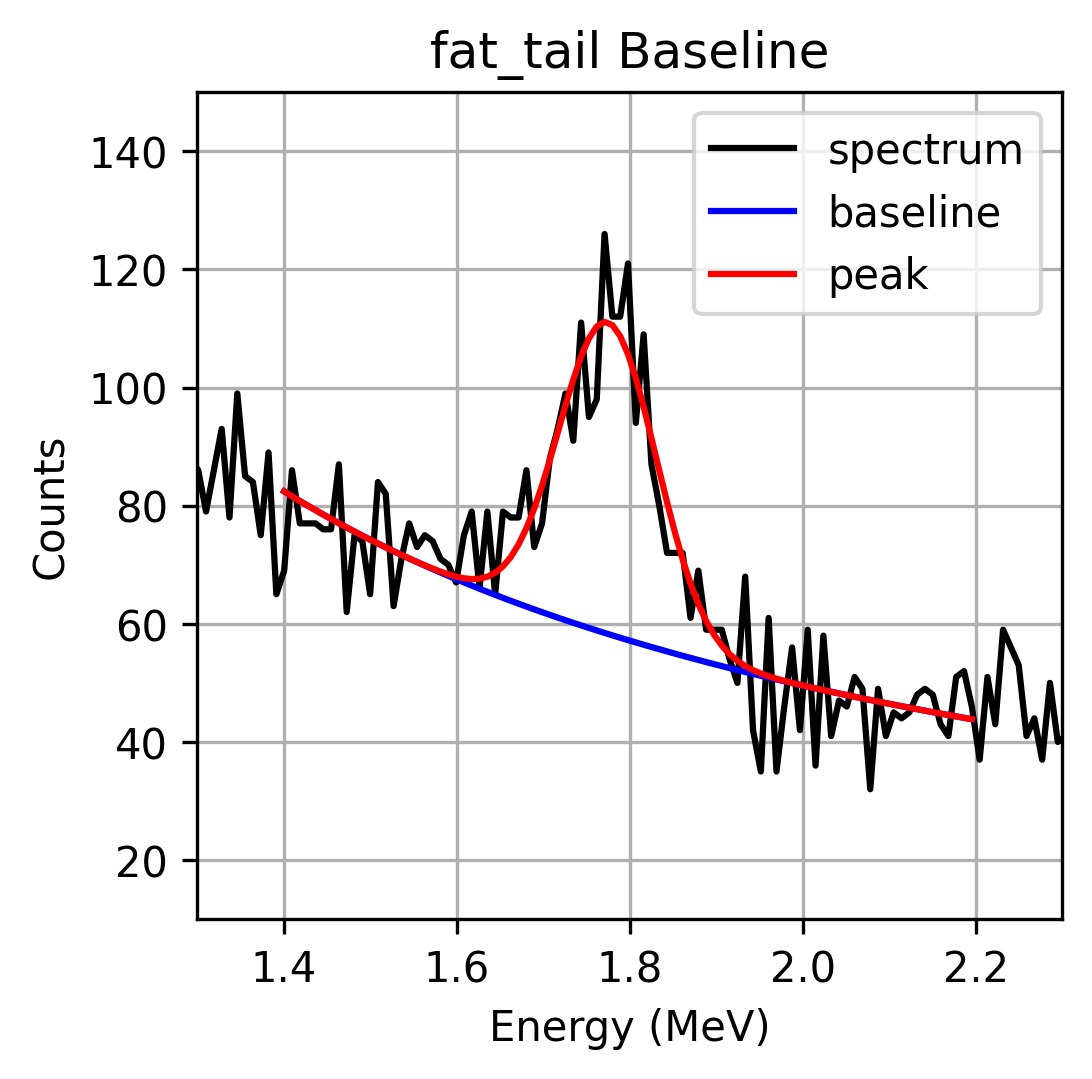

In [48]:
fit_labels = ['point_slope', 'exp_falloff', 'fat_tail']
for fit, fit_label in zip([point_slope_fits, exp_falloff_fits, fat_tail_fits], fit_labels):
    plt.figure(figsize=(3.72, 3.58), dpi=300)
    plt.plot(bins, spectrums[14][0][:], label='spectrum', color='black')
    plt.plot(fit['Si1']['bins'], fit['Si1']['baseline'], label='baseline', color='blue')
    plt.plot(fit['Si1']['bins'], fit['Si1']['peak'], label='peak', color='red')
    plt.xlim(1.3, 2.3)
    plt.ylim(10, 150)
    plt.legend()
    plt.title(fit_label+' Baseline')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Counts')
    plt.grid()
    plt.show()